In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# AD-Tech

This task is to practice exploratory data analysis, feature engineering and model training using the [Kaggle competition](https://www.kaggle.com/datasets/arashnic/ctrtest).

The goal is to use Analytical and ML skills to explore data, find corelation between fields, and predict total revenue in order to know the Impact of Digital Advertisement for any Business.

## Importing necessary libraries for the task

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import seaborn as sns

## Defining functions for plotting and running the model

In [ ]:
def plot_size_mass(grouped_df, column, xlabel, title, ylabel):
  plt.figure(figsize=(5, 3))
  plt.bar(grouped_df.index, grouped_df[column], color='blue')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(rotation=45)
  plt.show()


def plot_pairs(df, varx, vary):
  fig, ax = plt.subplots(figsize=(5,3))
  ax.scatter(df[varx], df[vary])
  ax.set_xlabel(varx)
  ax.set_ylabel(vary)
  plt.show()


def linear_regression(features, target, df):
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.show()
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)

    return model

## Reading and looking at the data

### Basic loading visualization

In [ ]:
df_adtech = pd.read_csv("/content/drive/MyDrive/task2/AD-Tech.csv")

In [ ]:
df_adtech.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,30-06-2019 00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,30-06-2019 00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,30-06-2019 00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,30-06-2019 00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,30-06-2019 00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [ ]:
df_adtech["date"] = pd.to_datetime(df_adtech["date"])
df_adtech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     567291 non-null  datetime64[ns]
 1   site_id                  567291 non-null  int64         
 2   ad_type_id               567291 non-null  int64         
 3   geo_id                   567291 non-null  int64         
 4   device_category_id       567291 non-null  int64         
 5   advertiser_id            567291 non-null  int64         
 6   order_id                 567291 non-null  int64         
 7   line_item_type_id        567291 non-null  int64         
 8   os_id                    567291 non-null  int64         
 9   integration_type_id      567291 non-null  int64         
 10  monetization_channel_id  567291 non-null  int64         
 11  ad_unit_id               567291 non-null  int64         
 12  total_impression

From the info and project objective, the focus is going to be the total_revenue. We can also see that there is no null data, so cleaning/filling the data is not needed

In [ ]:
df_adtech.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


We can see that the integration_type_id and revenue_share_percent are always 1, so it won't contribute to our model, so we can remove it

In [ ]:
df_adtech_rc = df_adtech.drop(columns=["revenue_share_percent", "integration_type_id"])

## EDA

### Generating a correlation heatmap to see how the columns affects the total_revenues

<ipython-input-10-29cd6b813372>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df_adtech_rc.corr()


<Axes: >

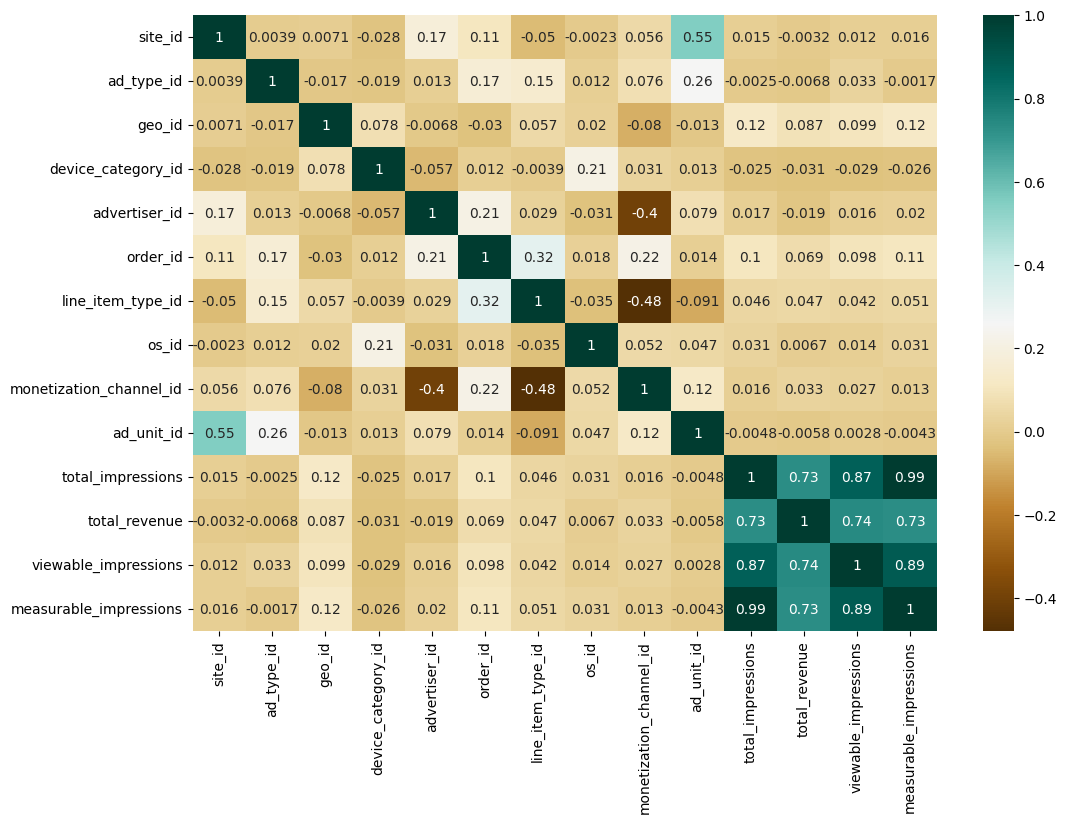

In [ ]:
c = df_adtech_rc.corr()
plt.figure(figsize=(12,8))
sns.heatmap(c,cmap="BrBG",annot=True)

In the correlation heatmap, we can see that total_revenue has great correlation with total_impressions, viewable_impressions and measurable_impressions, so let's focus on them first in our EDA, because they are going to be our best ally in predictions. We can also analyse others great relations to get insights, for example, ad_unit_id and site_id

### total_revenue, total_impressions, viewable_impressions and measurable_impressions histogram analysis

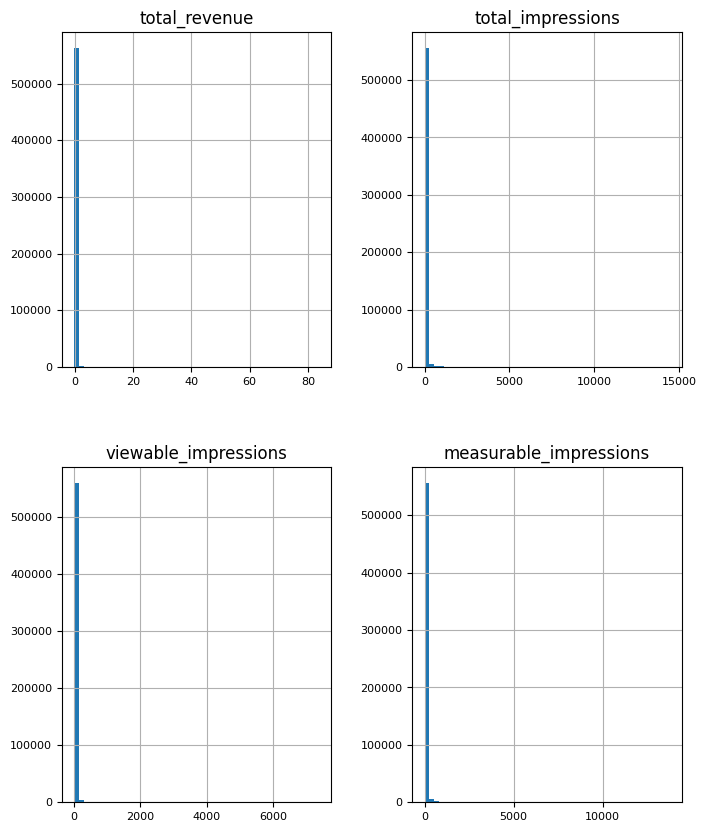

In [ ]:
columns = ["total_revenue", "total_impressions", "viewable_impressions", "measurable_impressions"]
df_adtech_rc[columns].hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8);

We can see that the great correlation comes from 2 parts
1 - Most of them are 0, as the histogram is showing
2 - When the impressions grows, it impacts the revenue in a scale that lots of impressions affects the revenue a little
So the conclusion is that when an ad gets a lot of impressions, few people come in click, and even fewer people buy

### Pair Plotting impressions vs revenue to confirm the histogram analysis

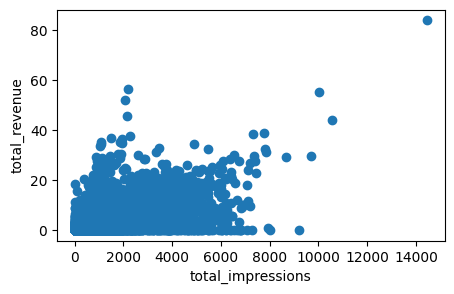

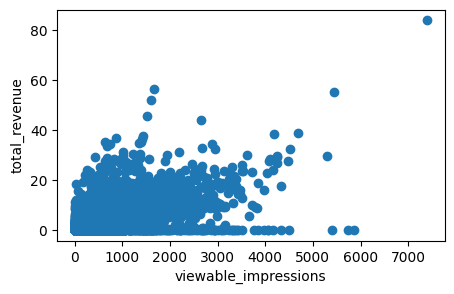

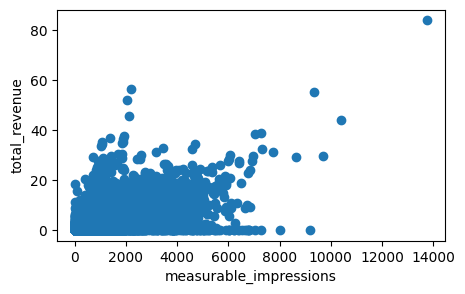

In [ ]:
for column in columns[1:]:
  plot_pairs(df_adtech_rc, column, "total_revenue")

The 3 distributions its almost the same proportionally, that's why the correlation is so close to each other, but basically shows that when impressions grows, it impacts a lot the revenue.
So the conclusion is to when analysing the other columns with not big correlations, we will use total_revenue and total_impressions to see how they impact them

### Analysing the relationship between date and impressions/revenue

Since individual dates itself doesn't matter much because it's not repeatable, the hour of the day and the weekday are. So we can analyse how hours and weekdays impact revenue and impressions

#### Weekday relation

In [ ]:
week_df = df_adtech_rc.groupby(df_adtech_rc["date"].dt.weekday).agg({"total_revenue": sum, "total_impressions": sum})
week_df.head()

,total_revenue,total_impressions
date,,
0,4580.1116,2204502
1,3689.1292,1729586
2,6160.3758,2925774
3,6125.2358,3123748
4,6535.0174,3172934


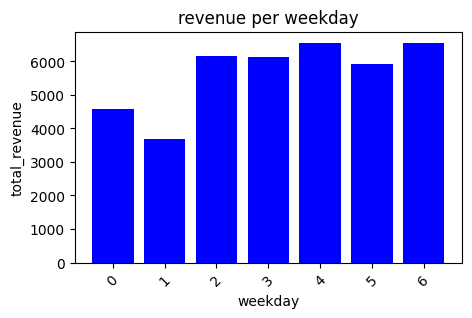

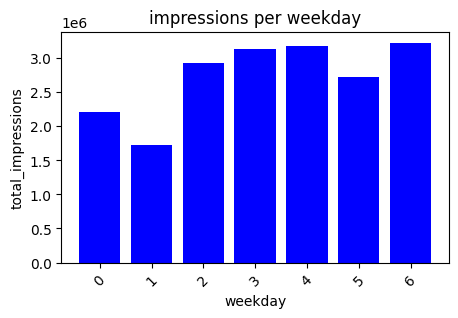

In [ ]:
plot_size_mass(week_df, "total_revenue", "weekday", "revenue per weekday", "total_revenue")
plot_size_mass(week_df, "total_impressions", "weekday", "impressions per weekday", "total_impressions")

Due to their high correlation, we can see that both distribution are very similar, we can check the correlation after for weekdays

#### Hour relation

In [ ]:
hour_df = df_adtech_rc.groupby(df_adtech_rc["date"].dt.hour).agg({"total_revenue": sum, "total_impressions": sum})
hour_df.head()

,total_revenue,total_impressions
date,,
0,39563.1192,19102772


In here we can see that hours is only 0, so the data doesn't registers hours, so we ignore hours

#### Checking correlation between weekday, impressions and revenue

In [ ]:
df_weekday = df_adtech_rc.assign(weekday=df_adtech_rc["date"].dt.weekday)[["weekday", "total_impressions", "total_revenue"]]
df_weekday.head()

,weekday,total_impressions,total_revenue
0,6,16,0.0
1,6,6,0.0
2,6,4,0.0
3,6,4,0.0
4,6,4,0.0


In [ ]:
df_mean_revenue_impressions = df_weekday.groupby("weekday", as_index=False).agg(
    mean_impressions_weekday=("total_impressions", "mean"),
    mean_revenue_weekday=("total_revenue", "mean"))
df_merged = pd.merge(df_weekday, df_mean_revenue_impressions, on="weekday", how="left")

<Axes: >

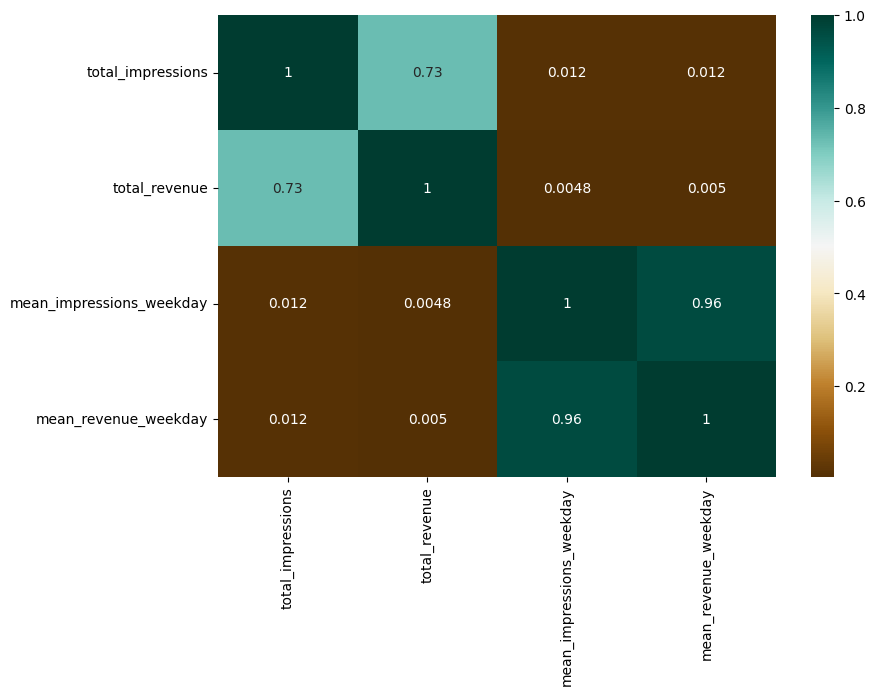

In [ ]:
c3 = df_merged.drop(columns=["weekday"]).corr()
plt.figure(figsize=(9,6))
sns.heatmap(c3,cmap="BrBG",annot=True)

Despite having different distributions when grouping the weekdays, we get almost do no correlation in individual analysis of each row of data, so we will discard this option

### Linear Regression

After seeing the good impressions x revenue correlations and discarding the date because correlation was too low, we make a simple linear regression to predict the revenue using the impressions

[-0.00666402 -0.00479182  0.00184124 ... -0.00479182 -0.00666402
 -0.00479182]


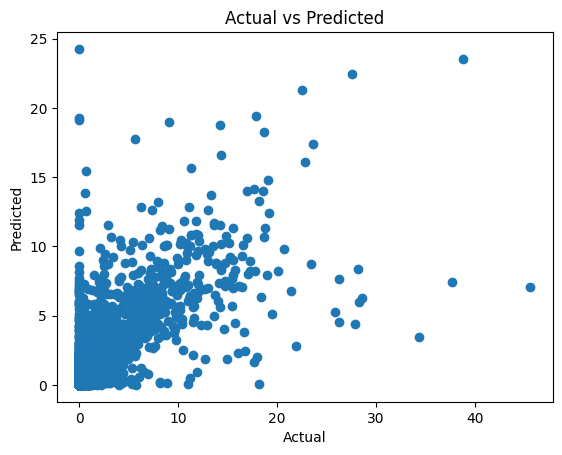

Accuracy: 0.5775586358664568


In [ ]:
target = "total_revenue"
features = list(columns)
features.remove(target)
model = linear_regression(features, target, df_adtech_rc)

## Saving the dataframe in JSON and pkl the model to build a python app

### pkl the model

In [ ]:
joblib.dump(model, '/content/drive/MyDrive/task2/model/linear_regression_model.pkl')

['/content/drive/MyDrive/task2/model/linear_regression_model.pkl']

### dropping the total_revenue columns because its the one that we want to predict

In [ ]:
df_json = df_adtech.drop(columns=["total_revenue"])

### reducing the dataframe size to less than 100MB so it can be uploadable to github in the app

In [ ]:
df_json_sampled = df_json.sample(frac=0.5, random_state=88)

### Saving the json

In [ ]:
df_json_sampled.to_json('/content/drive/MyDrive/task2/json/AD-Tech.json', orient='records')

In [ ]:
import sys
print(sys.version)
print(joblib.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.3.2


## Categorical Analysis

### Analysing columns with lower correlation distributions(Categorical)

In [ ]:
# Removed impressions, revenue and date because we already analysed date
columnslcorr = [item for item in df_adtech_rc.columns if item not in columns]
columnslcorr.remove("date")
columnslcorr

In [ ]:
df_adtech_rc[columnslcorr].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

We can see some distributions that could correlate a little bit with our revenue and impressions, such as advertiser_id and ad_type_id.
We can get also some insights here of what type os ads appears more, the sites that are more accessed with the ads, the most device used, the localization with geo_id, but that is not relevant for our goal. So now we correlate against impressions and revenue

### Analysing columns with lower correlation vs total_revenue and total_impressions(Categorical)

#### Total impressions

In [ ]:
sns.pairplot(data=df_adtech_rc,
                x_vars=columnslcorr,
                y_vars=['total_impressions'])

We can see that despite bad correlation, mostly because of these ids are numbers but not actually a number representation like impressions, all columns in some way can impact our impressions. For example, only in specific geo_ids the revenue actually goes up, but we can't use categorized columns in the model

#### Total Revenue

In [ ]:
sns.pairplot(data=df_adtech_rc,
                x_vars=columnslcorr,
                y_vars=['total_revenue'])

Here we can see that the distribution is almost the same as the impressions, due to their high correlation, reaching the same conclusion

In [ ]:
for column in columnslcorr:
  print(f"{column}: {df_adtech_rc[column].nunique()}")

So to analyze better this categorical(id) columns we need to binarize our data, using binary encoders, target encoders, group encoders or one-hot encoders

### Generating boxplots to check for possibles target encoders(Categorical)

#### Boxplot of revenue to get the distribution

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_adtech_rc['total_revenue'])
plt.title('Revenue Boxplot')
plt.xlabel('Revenue')
plt.show()

Here we can see that we have a big outliar

#### Boxplot vs total_revenue

In [ ]:
for column in columnslcorr:
  sns.catplot(data=df_adtech_rc,
                  x=column,
                  y='total_revenue',
                  kind="box")

We can conclude that target encoding will not be a good option for none of the categorical columns, because we don't have a good box distribution of the data to take a mean or average

### Binarizing ad_type_id because nunique is 2(Categorical)


#### Mapping ad_type_id

In [ ]:
df_adtech_rc["ad_type_id_binary"] = df_adtech_rc["ad_type_id"].map({10: 0, 17: 1})
df_adtech_rc.head()

#### Checking correlation

In [ ]:
c4 = df_adtech_rc[["total_revenue", "ad_type_id_binary"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(c4,cmap="BrBG",annot=True)

We got terrible correlation, so we ignore and drop it

In [ ]:
df_adtech_rc = df_adtech_rc.drop(columns=["ad_type_id_binary"])

### One hot encoding columns with n-unique <= 10(Categorical)

Since one hot encoding columns with a lot of unique values can overfit our models, let's focus on the least than 10

In [ ]:
columnsoh = ["site_id", "device_category_id", "line_item_type_id", "os_id", "monetization_channel_id"]
df_one_hot = df_adtech_rc[columnsoh + ["total_revenue"]]
df_one_hot.columns

In [ ]:
df_encoded = pd.get_dummies(df_one_hot, columns=columnsoh)
df_encoded.columns

Since we created a lot of columns, a heatmap will be too big to be worth showing, so lets focus on a specific correlation(>0.05) and print them

In [ ]:
c5 = df_encoded.corr()["total_revenue"]
features = c5[abs(c5) > 0.05].sort_values(ascending=False)
print("There are {} strongly correlated values with total revenue:\n{}".format(len(features), features))

We can see that only 2 line_item_type_id could pass a 0.05 correlation, which is still very low, but seeing in pairplot, it makes sense why it's appearing.
Another to look at is geo_id, since we can see that an specific id is getting the most revenue options, but we cant one hot encode it because it has a lot of unique values. Let's try and analyze these big categorical column by grouping them

### Trying to group to encode categorical columns with nunique >= 10(Categorical)

#### geo_id

In the boxplot geo_id vs total_revenue, it's possible to see that basically only 1 geo_id is really giving the revenue return, the others stand next to or close to 0, with the excpetion of another geo_id that some outliars almost reach 20. We can get better view by the mean of all revenue per geo_id

In [ ]:
geo_mean = df_adtech_rc.groupby("geo_id", as_index=False).agg(geo_id_mean_revenue=("total_revenue", "mean"))
geo_mean.sort_values(by=["geo_id_mean_revenue"], ascending=False).head()

In [ ]:
mapped_geo = pd.merge(df_adtech_rc, geo_mean, on='geo_id', how="left")[["geo_id_mean_revenue", "total_revenue"]]
c6 = mapped_geo.corr()
plt.figure(figsize=(9,6))
sns.heatmap(c6,cmap="BrBG",annot=True)

Here we can see that only 1 got bigger than 0.1 and only 3 got bigger than 0.01. By categorizing with 0,1,2(0 being < 0.01, 1 being between 0.01 and 0.1 and 2 > 0.1) we can one hot encode this way and check the correlation

In [ ]:
conversion = {i: 2 if i == 187 else 1 if i in [32, 10, 179] else 0 for i in df_adtech_rc['geo_id'].unique()}
mapping = df_adtech_rc.assign(mapped_geo_id=df_adtech_rc['geo_id'].map(conversion))[["mapped_geo_id", "total_revenue"]]
mapping_oh = pd.get_dummies(mapping, columns=["mapped_geo_id"])

In [ ]:
c6 = mapping_oh.corr()
plt.figure(figsize=(9,6))
sns.heatmap(c6,cmap="BrBG",annot=True)

#### advertiser_id

Using the same approach for geo_id

In [ ]:
adv_mean = df_adtech_rc.groupby("advertiser_id", as_index=False).agg(mean_revenue=("total_revenue", "mean"))
adv_mean.sort_values(by=["mean_revenue"], ascending=False).head()

In [ ]:
adv_mean.describe()